<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data loading</a></span><ul class="toc-item"><li><span><a href="#Tropopause" data-toc-modified-id="Tropopause-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tropopause</a></span></li><li><span><a href="#Zonal-wind" data-toc-modified-id="Zonal-wind-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Zonal wind</a></span><ul class="toc-item"><li><span><a href="#p-values" data-toc-modified-id="p-values-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>p-values</a></span></li></ul></li></ul></li><li><span><a href="#Figure-2" data-toc-modified-id="Figure-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 2</a></span><ul class="toc-item"><li><span><a href="#Using-Berlin-colormap" data-toc-modified-id="Using-Berlin-colormap-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Using Berlin colormap</a></span></li></ul></li></ul></div>

In [53]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import shapely.geometry as sgeom
from palettable.scientific.diverging import *#Vik_20, Berlin_20

In [4]:
%reload_ext watermark
%watermark --iversions -v -m

Python implementation: CPython
Python version       : 3.9.1
IPython version      : 7.20.0

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 5.8.0-38-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit

matplotlib: 3.3.4
numpy     : 1.19.2
shapely   : 1.7.0
xarray    : 0.17.0



In [2]:
timescale = 20
its = 10000
DJF_bool = '_DJFonly'
root_path = '/mnt/nas4.meop2/meop40.data.model/CMAM/0A.daily/'
cesta = f'{root_path}composites_woSSW{DJF_bool}/'

# Data loading

## Tropopause

In [3]:
infile_name = f'{cesta}ptrop_absolute_comp_*_{timescale}days.nc'
infiles = glob.glob(infile_name)
e_types = list(map(lambda x: x.split('comp_')[1].split('_{}days'.format(timescale))[0], infiles))
da_trop =  xr.open_mfdataset(infiles, concat_dim='e_type', combine = 'nested')
da_trop['e_type'] = e_types
da_trop['ptrop'] = da_trop.ptrop/100.
da_trop

<xarray.Dataset>
Dimensions:  (e_type: 3, lag: 21, lat: 48, lon: 96)
Coordinates:
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * lag      (lag) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * e_type   (e_type) <U9 'westamer' 'eastasia' 'himalayas'
Data variables:
    ptrop    (e_type, lag, lat, lon) float64 dask.array<chunksize=(1, 21, 48, 96), meta=np.ndarray>

## Zonal wind

In [4]:
var = 'ua'
e_type_ls = ['himalayas', 'eastasia', 'westamer']
what_ls = ['anomalies']#, 'absolute']
da_ls2 = []

for what in what_ls:
    da_ls = []
    print(what)
    for i,e_type in enumerate(e_type_ls):
        print(e_type)
        da = xr.open_dataarray('{}{}_{}_comp_{}_{}days.nc'.format(cesta, var, what, e_type, timescale))
        if var != 'lwa':
            da['plev'] = da.plev/100.
        else:
            da = da.rename({'z': 'plev'})

        da_ls.append(da)
    da_conc = xr.concat(da_ls, dim = 'e_type')
    da_conc['e_type'] = e_type_ls
    da_ls2.append(da_conc)
        
da_all = xr.concat(da_ls2, dim = 'what')
da_all['what'] = what_ls

anomalies
himalayas
eastasia
westamer


### p-values

In [5]:
infile_name = f'{cesta}{var}_pvalues_from{its}_comp_*_{timescale}days_zm.nc'
infiles = glob.glob(infile_name)
comp_types = list(map(lambda x: x.split('comp_')[1].split('_{}days'.format(timescale))[0], infiles))
print(comp_types)
print(infiles)
print()
ds_p = xr.open_mfdataset(infiles, concat_dim='e_type', combine='nested')
ds_p['e_type'] = comp_types
ds_p['plev'] = ds_p.plev/100.
ds_p

['eastasia', 'himalayas', 'westamer']
['/mnt/nas4.meop2/meop40.data.model/CMAM/0A.daily/composites_woSSW_DJFonly/ua_pvalues_from10000_comp_eastasia_20days_zm.nc', '/mnt/nas4.meop2/meop40.data.model/CMAM/0A.daily/composites_woSSW_DJFonly/ua_pvalues_from10000_comp_himalayas_20days_zm.nc', '/mnt/nas4.meop2/meop40.data.model/CMAM/0A.daily/composites_woSSW_DJFonly/ua_pvalues_from10000_comp_westamer_20days_zm.nc']



<xarray.Dataset>
Dimensions:  (e_type: 3, lat: 48, plev: 63)
Coordinates:
  * plev     (plev) float64 1e+03 925.0 850.0 800.0 ... 0.0015 0.001 0.0007
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
    lag      int64 0
  * e_type   (e_type) <U9 'eastasia' 'himalayas' 'westamer'
Data variables:
    ua       (e_type, plev, lat) float64 dask.array<chunksize=(1, 63, 48), meta=np.ndarray>

### tendency

In [18]:
var = 'dzmuadt'
e_type_ls = ['himalayas', 'eastasia', 'westamer']
what_ls = ['anomalies']#, 'absolute']
da_ls2 = []

for what in what_ls:
    da_ls = []
    print(what)
    for i,e_type in enumerate(e_type_ls):
        print(e_type)
        da = xr.open_dataarray('{}{}_{}_comp_{}_{}days.nc'.format(cesta, var, what, e_type, timescale))
        if var != 'lwa':
            da['plev'] = da.plev/100.
        else:
            da = da.rename({'z': 'plev'})

        da_ls.append(da)
    da_conc = xr.concat(da_ls, dim = 'e_type')
    da_conc['e_type'] = e_type_ls
    da_ls2.append(da_conc)
        
da_all_tend = xr.concat(da_ls2, dim = 'what')
da_all_tend['what'] = what_ls

anomalies
himalayas
eastasia
westamer


#### p-values

In [7]:
infile_name = f'{cesta}{var}_pvalues_from{its}_comp_*_{timescale}days.nc'
infiles = glob.glob(infile_name)
comp_types = list(map(lambda x: x.split('comp_')[1].split('_{}days'.format(timescale))[0], infiles))
ds_p_tend = xr.open_mfdataset(infiles, concat_dim='e_type', combine='nested')
ds_p_tend['e_type'] = comp_types
ds_p_tend['plev'] = ds_p_tend.plev/100.
ds_p_tend

<xarray.Dataset>
Dimensions:  (e_type: 3, lag: 21, lat: 48, plev: 63)
Coordinates:
  * plev     (plev) float64 1e+03 925.0 850.0 800.0 ... 0.0015 0.001 0.0007
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lag      (lag) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * e_type   (e_type) <U9 'himalayas' 'westamer' 'eastasia'
Data variables:
    dzmuadt  (e_type, plev, lat, lag) float64 dask.array<chunksize=(1, 63, 48, 21), meta=np.ndarray>

In [10]:
pv_limit = 0.05 #0.05
da_all_tend = da_all_tend.sel(lag = 0).where(ds_p_tend[var].sel(lag = 0) < pv_limit)    

# Figure 2

0
1
2
dzmuadt+tend_anomalies_all_20days_zm_wsignificance_DJFonly.pdf


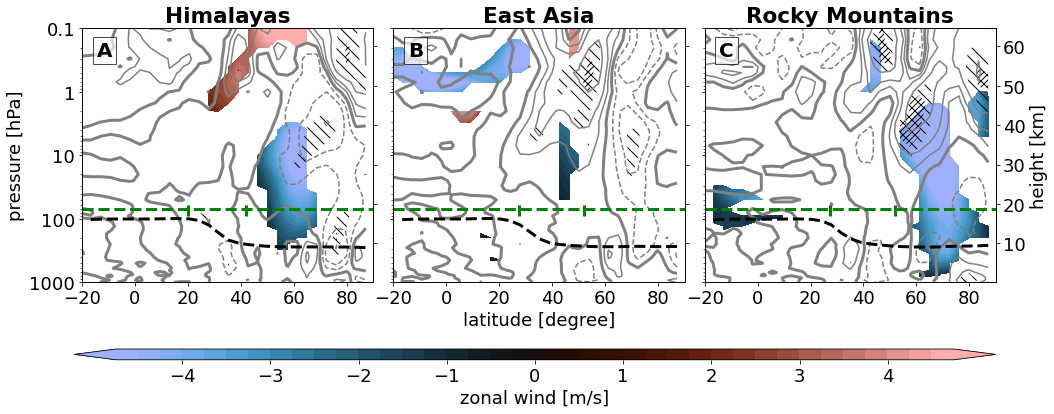

In [34]:
levels = np.linspace(-5,5,41)
titles = ['Himalayas', 'East Asia', 'Rocky Mountains']# 'West America']
#var = 'vmro3'
#anomalies
mpl.rcParams.update({'font.size': 18})
cmap = mpl.cm.RdBu_r
cmap = Berlin_20.mpl_colormap
lat_start = -20

sel_dict = dict(plev = slice(None, 0.1), lat = slice(lat_start,None))
p.data  = ds_p['ua'].sel(**sel_dict)
temp = da_all.sel(what = what_ls[0], lag = 0).mean('lon').where(ds_p['ua'] < pv_limit)
p = temp.plot.contourf(x= 'lat', \
                                                               y = 'plev', \
                                                               col = 'e_type', \
                                                               yincrease = False, \
                                                               size = 5, \
                                                                cmap = cmap, \
                                                               levels = levels, \
                                                               add_colorbar = False)
p.data = da_all_tend.sel(lag = 0).squeeze()*24*3600


levels2 = [0.5,1,2,5]#10,30,50,80]
lev0 = [0]
dashed = True
cbar_label = 'zonal wind [m/s]'
    
plot_kwargs = dict(yincrease = False, \
                   colors = 'grey', \
                   levels=levels2, add_colorbar=False, alpha =1 ) #0.7 #
dashed = True
p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

if dashed:
    plot_kwargs['linestyles'] = 'dashed'
    plot_kwargs['levels'] = np.array(levels2)[::-1]*-1
    p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

plot_kwargs['linestyles'] = 'solid'
plot_kwargs['levels'] = lev0
plot_kwargs['linewidths'] = 3
plot_kwargs['alpha'] = 1


p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

#sel_dict = dict(plev = slice(None, 0.1), lat = slice(lat_start,None))
p.data  = ds_p_tend[var].sel(lag = 0)#ds_p['ua'].sel(**sel_dict)
plot_kwargs2 = dict(levels = [0,0.05], hatches=['\\\\',None], \
                                colors='none', add_colorbar=False, \
                                 yincrease = False)
p.map_dataarray(xr.plot.contourf, 'lat', 'plev', **plot_kwargs2)

plot_kwargs2['levels'] = [0,0.01]
plot_kwargs2['hatches'] = ['////',None]
p.map_dataarray(xr.plot.contourf, 'lat', 'plev', **plot_kwargs2)



p.axes[0][0].set_ylabel('pressure [hPa]')
p.axes[0][0].set_xlabel('')
p.axes[0][1].set_xlabel('latitude [degree]')
p.axes[0][2].set_xlabel('')

label_ls = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
da_trop2 = da_trop.ptrop.sel(lag=0, lat = slice(lat_start,None)).mean('lon')
for i,(ax, sel_dict, label) in enumerate(zip(p.axes.flat, p.name_dicts.flat, label_ls)):
    print(i)
    ax.plot(da_trop2.lat, da_trop2.sel(e_type = sel_dict['e_type']), 'k--', lw = 3)

    ax.hlines(70,lat_start,90, color = 'green', linestyles='--', linewidths = 3)
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize = 20, 
              fontweight='bold', va='top', bbox={'alpha': 0.7, 'facecolor': 'white'})
    e_type = sel_dict['e_type']
    if e_type == 'himalayas':
        box = sgeom.box(minx=70, maxx=105, miny=20, maxy=42)
    elif e_type == 'eastasia':
        box = sgeom.box(minx=110, maxx=145, miny=27.5, maxy=52)
    elif e_type == 'westamer':
        box = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)
    ax.vlines(list(box.bounds)[1::2],90,50, color = 'green', linestyles='--', linewidths = 3)
    
    ax.axis([-20, 90, 1000, 0.1])
    ax.set_yscale('log')
    ax.set_yticks([1000,100,10,1,0.1])
    ax.set_title(titles[i], fontdict=dict(fontweight = 'bold'))
    fmt = mpl.ticker.FormatStrFormatter("%g")
    ax.yaxis.set_major_formatter(fmt)
    ax.set_xticks([-20,0,20,40,60,80])
    
    ax2 = ax.twinx()
    ax2.get_shared_y_axes()
    ax2.axis([-20, 90, 7*np.log(1013.25/1000), 7*np.log(1013.25/0.1)])
    ax2.tick_params(direction='out', which='both')
    if i != 2:
        ax2.set_yticklabels([])
    if i == 2:
        ax2.set_ylabel('height [km]')


p.fig.subplots_adjust(right=0.875)
cbar_ax = p.fig.add_axes([0.075, -0.03, .8, .03])
norm = mpl.colors.BoundaryNorm(levels[1:-1], cmap.N)
label = cbar_label
cb2 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,  \
                                norm=norm, orientation='horizontal', \
                                boundaries=levels, extend='both',  label = cbar_label, \
                                ticks=[-4,-3,-2,-1,0,1,2,3,4], spacing='proportional')

outfile='{}_{}_{}_{}days_zm_wsignificance_DJFonly.pdf'.format(var+'+tend', what_ls[0], 'all', timescale)
print(outfile)
#plt.savefig(outfile, dpi = 300, bbox_inches='tight')

0
1
2
ua+tend_anomalies_all_20days_zm_wsignificance_DJFonly.pdf


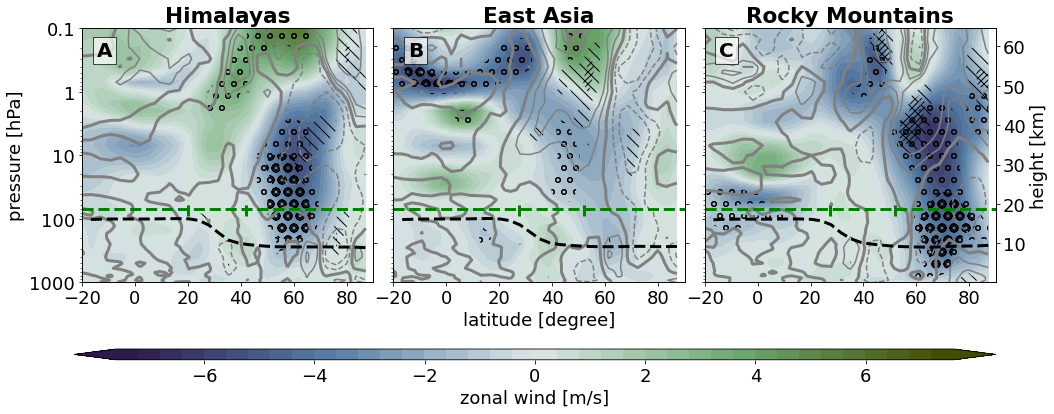

In [72]:
levels = np.linspace(-8,8,41)
titles = ['Himalayas', 'East Asia', 'Rocky Mountains']# 'West America']
#var = 'vmro3'
#anomalies
mpl.rcParams.update({'font.size': 18})
cmap = mpl.cm.RdBu_r
cmap = Berlin_20.mpl_colormap
cmap = Vik_5.mpl_colormap
cmap = Cork_5.mpl_colormap
lat_start = -20

sel_dict = dict(plev = slice(None, 0.1), lat = slice(lat_start,None))
p.data  = ds_p['ua'].sel(**sel_dict)
temp = da_all.sel(what = what_ls[0], lag = 0).mean('lon')#.where(ds_p['ua'] < pv_limit)
p = temp.plot.contourf(x= 'lat', \
                                                               y = 'plev', \
                                                               col = 'e_type', \
                                                               yincrease = False, \
                                                               size = 5, \
                                                                cmap = cmap, \
                                                               levels = levels, \
                                                               add_colorbar = False)
p.data = da_all_tend.sel(lag = 0).squeeze()*24*3600


levels2 = [0.5,1,3]#10,30,50,80]
lev0 = [0]
dashed = True
cbar_label = 'zonal wind [m/s]'
    
plot_kwargs = dict(yincrease = False, \
                   colors = 'grey', \
                   levels=levels2, add_colorbar=False, alpha =1 ) #0.7 #
dashed = True
p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

if dashed:
    plot_kwargs['linestyles'] = 'dashed'
    plot_kwargs['levels'] = np.array(levels2)[::-1]*-1
    p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

plot_kwargs['linestyles'] = 'solid'
plot_kwargs['levels'] = lev0
plot_kwargs['linewidths'] = 3
plot_kwargs['alpha'] = 1


p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

#sel_dict = dict(plev = slice(None, 0.1), lat = slice(lat_start,None))
p.data  = ds_p_tend[var].sel(lag = 0)#ds_p['ua'].sel(**sel_dict)
plot_kwargs2 = dict(levels = [0,0.05], hatches=['\\\\',None], \
                                colors='none', add_colorbar=False, \
                                 yincrease = False)
p.map_dataarray(xr.plot.contourf, 'lat', 'plev', **plot_kwargs2)

plot_kwargs2['levels'] = [0,0.01]
plot_kwargs2['hatches'] = ['////',None]
p.map_dataarray(xr.plot.contourf, 'lat', 'plev', **plot_kwargs2)

p.data  = ds_p['ua']#.sel(**sel_dict)
plot_kwargs2 = dict(levels = [0,0.05], hatches=['o',None], \
                                colors='none', add_colorbar=False, \
                                 yincrease = False)
p.map_dataarray(xr.plot.contourf, 'lat', 'plev', **plot_kwargs2)

plot_kwargs2['levels'] = [0,0.01]
plot_kwargs2['hatches'] = ['O',None]
p.map_dataarray(xr.plot.contourf, 'lat', 'plev', **plot_kwargs2)



p.axes[0][0].set_ylabel('pressure [hPa]')
p.axes[0][0].set_xlabel('')
p.axes[0][1].set_xlabel('latitude [degree]')
p.axes[0][2].set_xlabel('')

label_ls = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
da_trop2 = da_trop.ptrop.sel(lag=0, lat = slice(lat_start,None)).mean('lon')
for i,(ax, sel_dict, label) in enumerate(zip(p.axes.flat, p.name_dicts.flat, label_ls)):
    print(i)
    ax.plot(da_trop2.lat, da_trop2.sel(e_type = sel_dict['e_type']), 'k--', lw = 3)

    ax.hlines(70,lat_start,90, color = 'green', linestyles='--', linewidths = 3)
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize = 20, 
              fontweight='bold', va='top', bbox={'alpha': 0.7, 'facecolor': 'white'})
    e_type = sel_dict['e_type']
    if e_type == 'himalayas':
        box = sgeom.box(minx=70, maxx=105, miny=20, maxy=42)
    elif e_type == 'eastasia':
        box = sgeom.box(minx=110, maxx=145, miny=27.5, maxy=52)
    elif e_type == 'westamer':
        box = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)
    ax.vlines(list(box.bounds)[1::2],90,50, color = 'green', linestyles='--', linewidths = 3)
    
    ax.axis([-20, 90, 1000, 0.1])
    ax.set_yscale('log')
    ax.set_yticks([1000,100,10,1,0.1])
    ax.set_title(titles[i], fontdict=dict(fontweight = 'bold'))
    fmt = mpl.ticker.FormatStrFormatter("%g")
    ax.yaxis.set_major_formatter(fmt)
    ax.set_xticks([-20,0,20,40,60,80])
    
    ax2 = ax.twinx()
    ax2.get_shared_y_axes()
    ax2.axis([-20, 90, 7*np.log(1013.25/1000), 7*np.log(1013.25/0.1)])
    ax2.tick_params(direction='out', which='both')
    if i != 2:
        ax2.set_yticklabels([])
    if i == 2:
        ax2.set_ylabel('height [km]')


p.fig.subplots_adjust(right=0.875)
cbar_ax = p.fig.add_axes([0.075, -0.03, .8, .03])
norm = mpl.colors.BoundaryNorm(levels[1:-1], cmap.N)
label = cbar_label
cb_ticks = np.arange(-8,9,2)
cb2 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,  \
                                norm=norm, orientation='horizontal', \
                                boundaries=levels, extend='both',  label = cbar_label, \
                                ticks=cb_ticks, spacing='proportional')

outfile=f'ua+tend_{what_ls[0]}_all_{timescale}days_zm_wsignificance_DJFonly.pdf'
print(outfile)
plt.savefig(outfile, dpi = 300, bbox_inches='tight')

0
1
2
dzmuadt+tend_anomalies_all_20days_zm_wsignificance_DJFonly.pdf


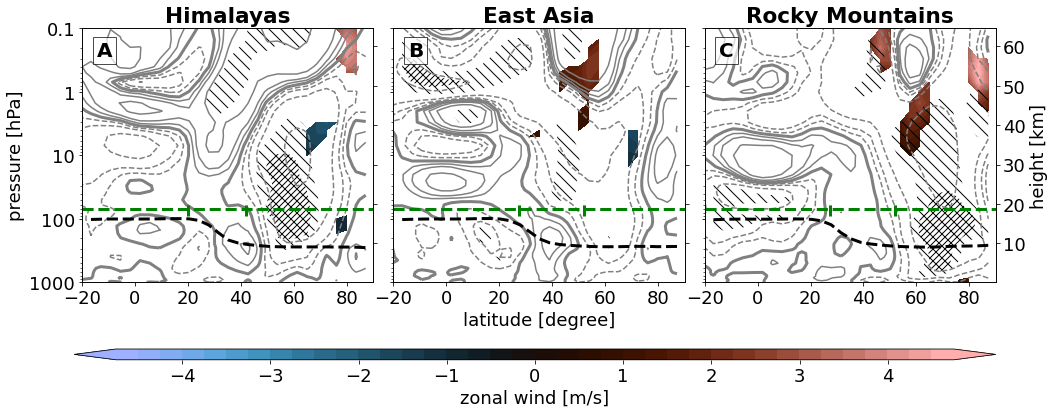

In [30]:
levels = np.linspace(-5,5,41)
titles = ['Himalayas', 'East Asia', 'Rocky Mountains']# 'West America']
#var = 'vmro3'
#anomalies
mpl.rcParams.update({'font.size': 18})
cmap = mpl.cm.RdBu_r
cmap = Berlin_20.mpl_colormap
lat_start = -20

pv_limit = 0.05 #0.05
temp = da_all_tend.sel(lag = 0).where(ds_p_tend[var].sel(lag = 0) < pv_limit)    
p = (temp.squeeze()*24*3600).plot.contourf(x= 'lat', \
                                                               y = 'plev', \
                                                               col = 'e_type', \
                                                               yincrease = False, \
                                                               size = 5, \
                                                               cmap = cmap, \
                                                               levels = levels, \
                                                               add_colorbar = False)
p.data = da_all.sel(what = what_ls[0], lag = 0).mean('lon')


levels2 = [0.5,1,2,5]#10,30,50,80]
lev0 = [0]
dashed = True
cbar_label = 'zonal wind [m/s]'
    
plot_kwargs = dict(yincrease = False, \
                   colors = 'grey', \
                   levels=levels2, add_colorbar=False, alpha =1 ) #0.7 #
dashed = True
p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

if dashed:
    plot_kwargs['linestyles'] = 'dashed'
    plot_kwargs['levels'] = np.array(levels2)[::-1]*-1
    p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

plot_kwargs['linestyles'] = 'solid'
plot_kwargs['levels'] = lev0
plot_kwargs['linewidths'] = 3
plot_kwargs['alpha'] = 1


p.map_dataarray(xr.plot.contour, 'lat', 'plev', **plot_kwargs)

sel_dict = dict(plev = slice(None, 0.1), lat = slice(lat_start,None))
p.data  = ds_p['ua'].sel(**sel_dict)
plot_kwargs2 = dict(levels = [0,0.05], hatches=['\\\\',None], \
                                colors='none', add_colorbar=False, \
                                 yincrease = False)
p.map_dataarray(xr.plot.contourf, 'lat', 'plev', **plot_kwargs2)

plot_kwargs2['levels'] = [0,0.01]
plot_kwargs2['hatches'] = ['////',None]
p.map_dataarray(xr.plot.contourf, 'lat', 'plev', **plot_kwargs2)



p.axes[0][0].set_ylabel('pressure [hPa]')
p.axes[0][0].set_xlabel('')
p.axes[0][1].set_xlabel('latitude [degree]')
p.axes[0][2].set_xlabel('')

label_ls = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
da_trop2 = da_trop.ptrop.sel(lag=0, lat = slice(lat_start,None)).mean('lon')
for i,(ax, sel_dict, label) in enumerate(zip(p.axes.flat, p.name_dicts.flat, label_ls)):
    print(i)
    ax.plot(da_trop2.lat, da_trop2.sel(e_type = sel_dict['e_type']), 'k--', lw = 3)

    ax.hlines(70,lat_start,90, color = 'green', linestyles='--', linewidths = 3)
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize = 20, 
              fontweight='bold', va='top', bbox={'alpha': 0.7, 'facecolor': 'white'})
    e_type = sel_dict['e_type']
    if e_type == 'himalayas':
        box = sgeom.box(minx=70, maxx=105, miny=20, maxy=42)
    elif e_type == 'eastasia':
        box = sgeom.box(minx=110, maxx=145, miny=27.5, maxy=52)
    elif e_type == 'westamer':
        box = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)
    ax.vlines(list(box.bounds)[1::2],90,50, color = 'green', linestyles='--', linewidths = 3)
    
    ax.axis([-20, 90, 1000, 0.1])
    ax.set_yscale('log')
    ax.set_yticks([1000,100,10,1,0.1])
    ax.set_title(titles[i], fontdict=dict(fontweight = 'bold'))
    fmt = mpl.ticker.FormatStrFormatter("%g")
    ax.yaxis.set_major_formatter(fmt)
    ax.set_xticks([-20,0,20,40,60,80])
    
    ax2 = ax.twinx()
    ax2.get_shared_y_axes()
    ax2.axis([-20, 90, 7*np.log(1013.25/1000), 7*np.log(1013.25/0.1)])
    ax2.tick_params(direction='out', which='both')
    if i != 2:
        ax2.set_yticklabels([])
    if i == 2:
        ax2.set_ylabel('height [km]')


p.fig.subplots_adjust(right=0.875)
cbar_ax = p.fig.add_axes([0.075, -0.03, .8, .03])
norm = mpl.colors.BoundaryNorm(levels[1:-1], cmap.N)
label = 'zonal wind tendency [m/s/day]'
cb2 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,  \
                                norm=norm, orientation='horizontal', \
                                boundaries=levels, extend='both',  label = cbar_label, \
                                ticks=[-4,-3,-2,-1,0,1,2,3,4], spacing='proportional')

outfile='{}_{}_{}_{}days_zm_wsignificance_DJFonly.pdf'.format(var+'+tend', what_ls[0], 'all', timescale)
print(outfile)
#plt.savefig(outfile, dpi = 300, bbox_inches='tight')